In [1]:
import pandas as pd

arbolado = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/arbolado-publico-lineal/arbolado-publico-lineal-2017-2018.csv")

C:\Anaconda3\envs\DH\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
print (arbolado.shape)
arbolado.head()

(370180, 18)


,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800.0,848.0,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0


In [22]:

data = arbolado[["long","lat","nombre_cientifico","diametro_altura_pecho","altura_arbol"]]
data = data[data["nombre_cientifico"].isin(data["nombre_cientifico"].value_counts().index[9:12])]
data = data.dropna()
print (data["nombre_cientifico"].value_counts())
print (data.shape)
display (data.head())

Ligustrum lucidum     8635
Tipuana tipu          8414
Fraxinus excelsior    8253
Name: nombre_cientifico, dtype: int64
(25302, 5)


,long,lat,nombre_cientifico,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,Tipuana tipu,88.0,34.0
227,-58.373797,-34.624333,Fraxinus excelsior,29.0,9.0
314,-58.380111,-34.619661,Fraxinus excelsior,20.0,7.0
316,-58.379695,-34.618541,Fraxinus excelsior,6.0,3.0
319,-58.380111,-34.619661,Fraxinus excelsior,23.0,8.0


In [19]:
import seaborn as sns



<AxesSubplot:xlabel='long', ylabel='lat'>

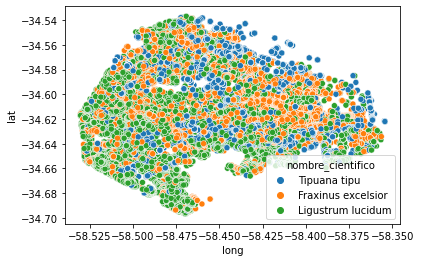

In [23]:
sns.scatterplot(data=data, x="long", y="lat", hue="nombre_cientifico")

<AxesSubplot:xlabel='diametro_altura_pecho', ylabel='altura_arbol'>

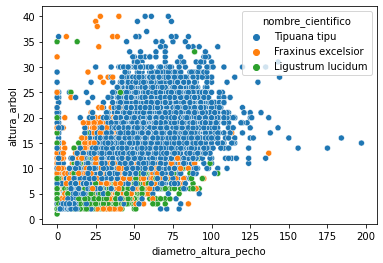

In [24]:
sns.scatterplot(data=data, x="diametro_altura_pecho", y="altura_arbol", hue="nombre_cientifico")

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm


In [52]:
def CV(X_train,X_test,y_train, y_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)

    kf = KFold(n_splits=5, shuffle=True)

    scores = []

    for i in tqdm(range(1, 50)):

        model = KNeighborsClassifier(n_neighbors=i)
        cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
        dict_row_score = {'score_medio':np.mean(cv_scores),
                        'score_std':np.std(cv_scores), 'n_neighbors':i}
        scores.append(dict_row_score)

    df_scores = pd.DataFrame(scores)
    plt.plot(df_scores['n_neighbors'], df_scores['score_medio'])
    plt.show()

    i = df_scores["score_medio"].idxmax()
    score_max = df_scores['score_medio'].iloc[i]
    k_score_max = df_scores['n_neighbors'].iloc[i]
    print (f"Mejor score: {score_max} con k={k_score_max}\n")





Long - Lat


100%|██████████| 49/49 [00:46<00:00,  1.05it/s]


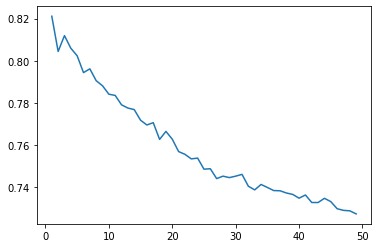

Mejor score: 0.8211417607605815 con k=1

Altura - Diametro


100%|██████████| 49/49 [00:43<00:00,  1.13it/s]


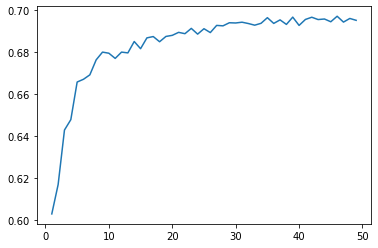

Mejor score: 0.69724927841664 con k=46

Todo


100%|██████████| 49/49 [00:57<00:00,  1.18s/it]


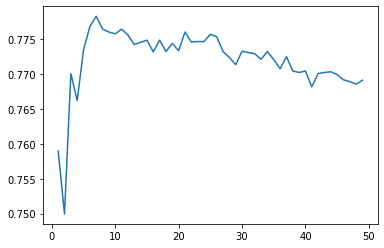

Mejor score: 0.7782988403298111 con k=7



In [53]:
print ("Long - Lat")
CV (*train_test_split(data.drop(columns=["nombre_cientifico","altura_arbol","diametro_altura_pecho"]), data["nombre_cientifico"]))

print ("Altura - Diametro")
CV (*train_test_split(data.drop(columns=["nombre_cientifico","long","lat"]), data["nombre_cientifico"]))

print ("Todo")
CV (*train_test_split(data.drop(columns=["nombre_cientifico"]), data["nombre_cientifico"]))

In [70]:
# Vamos a repetir con LogisticRegression

from sklearn.linear_model import LogisticRegression


def CV(X_train,X_test,y_train, y_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)

    kf = KFold(n_splits=5, shuffle=True)

    scores = []

    Cs = [0.001,0.01,0.1,1.10,100,1000] # Modificamos aca

    for i in tqdm(Cs):

        model = LogisticRegression(C=i) # Modificamos aca
        cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
        dict_row_score = {'score_medio':np.mean(cv_scores),
                        'score_std':np.std(cv_scores), 'n_neighbors':i}
        scores.append(dict_row_score)

    df_scores = pd.DataFrame(scores)
    plt.plot(df_scores['n_neighbors'], df_scores['score_medio'])
    plt.show()

    i = df_scores["score_medio"].idxmax()
    score_max = df_scores['score_medio'].iloc[i]
    k_score_max = df_scores['n_neighbors'].iloc[i]
    print (f"Mejor score: {score_max} con k={k_score_max}\n")
    model = LogisticRegression(C=k_score_max)
    model.fit(X_train,y_train)
    print (f"Coeficientes: {model.coef_}")

Long - Lat


100%|██████████| 6/6 [00:03<00:00,  1.62it/s]


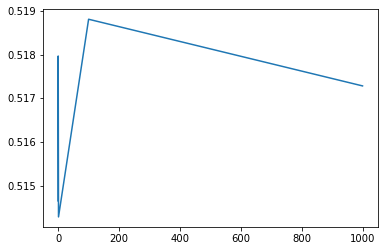

Mejor score: 0.5188130214038493 con k=100.0

Coeficientes: [[ 0.13554634  0.19388056]
 [-0.44542627 -0.59933618]
 [ 0.30987993  0.40545562]]
Altura - Diametro


100%|██████████| 6/6 [00:04<00:00,  1.32it/s]


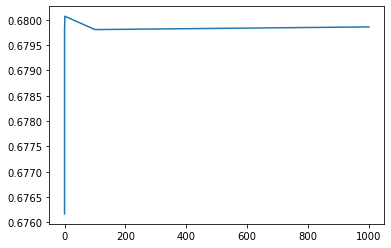

Mejor score: 0.6800691248398216 con k=1.1

Coeficientes: [[-0.44763745  0.47998309]
 [-0.04292607 -1.66298503]
 [ 0.49056352  1.18300194]]
Todo


100%|██████████| 6/6 [00:04<00:00,  1.25it/s]


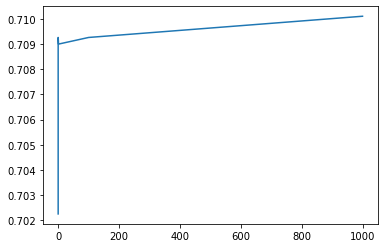

Mejor score: 0.7101071927873595 con k=1000.0

Coeficientes: [[ 0.08129423  0.24577023 -0.34306398  0.29881454]
 [-0.3694146  -0.40701584 -0.29728293 -1.28287275]
 [ 0.28812037  0.16124561  0.64034691  0.98405821]]


In [71]:
print ("Long - Lat")
CV (*train_test_split(data.drop(columns=["nombre_cientifico","altura_arbol","diametro_altura_pecho"]), data["nombre_cientifico"]))

print ("Altura - Diametro")
CV (*train_test_split(data.drop(columns=["nombre_cientifico","long","lat"]), data["nombre_cientifico"]))

print ("Todo")
CV (*train_test_split(data.drop(columns=["nombre_cientifico"]), data["nombre_cientifico"]))

<AxesSubplot:xlabel='lat', ylabel='nombre_cientifico'>

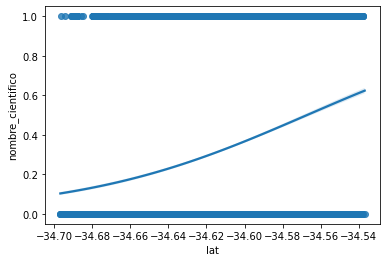

In [75]:
sns.regplot(data=data, y=data["nombre_cientifico"]==data["nombre_cientifico"].unique()[0], x="lat", logistic=True)
